In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


acuracy: 0.92


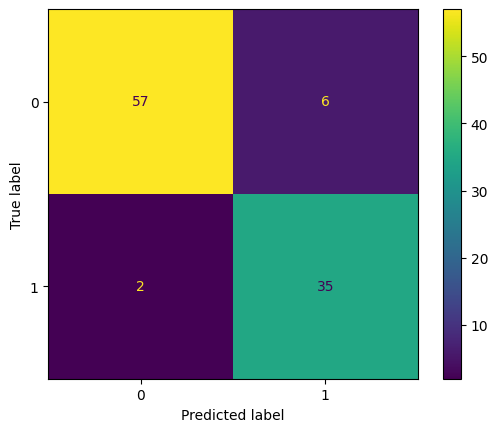

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=32,max_depth=3)
dtc.fit(x_train_scaled, y_train)
y_pred = dtc.predict(x_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
print("acuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

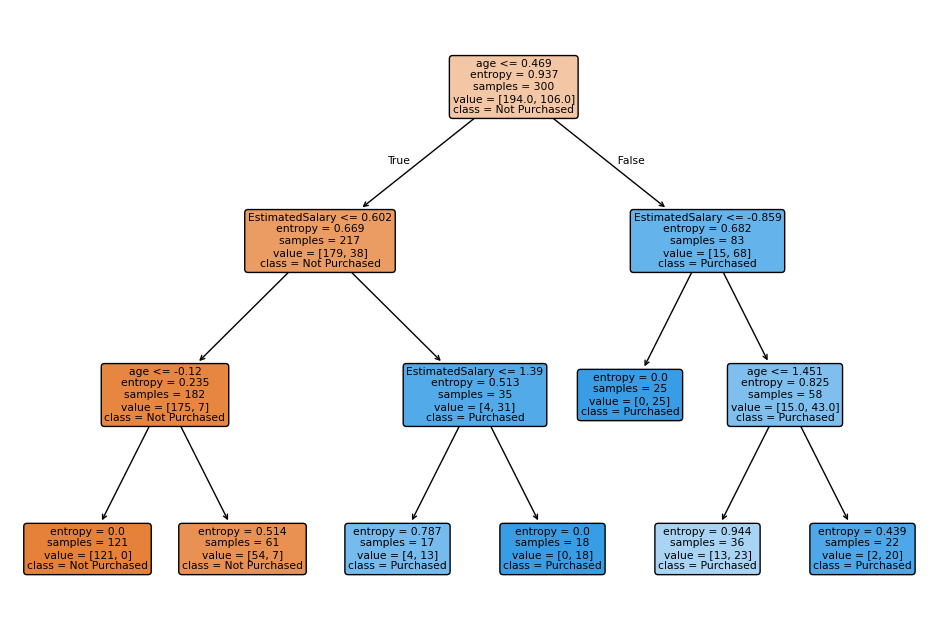

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtc,feature_names=["age","EstimatedSalary"],class_names=["Not Purchased","Purchased"],filled=True,rounded=True)
plt.show()

In [10]:
####Another Way for Decision Tree #######
data=sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
data["age"].fillna({"age":data["age"].median},inplace=True)
# data["deck"].fillna(data["deck"].mode()[0],inplace=True)
data["embarked"]=data["embarked"].fillna(data["embarked"].mode()[0])


In [18]:
data=data[["survived","age","fare","sex","pclass","embarked"]]
X=data.drop("survived",axis=1)
y=data["survived"]
print(X.head())

    age     fare     sex  pclass embarked
0  22.0   7.2500    male       3        S
1  38.0  71.2833  female       1        C
2  26.0   7.9250  female       3        S
3  35.0  53.1000  female       1        S
4  35.0   8.0500    male       3        S


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
X["sex"]=le.fit_transform(X["sex"])
X["embarked"]=le.fit_transform(X["embarked"])
print(X.head())


    age     fare  sex  pclass  embarked
0  22.0   7.2500    1       3         2
1  38.0  71.2833    0       1         0
2  26.0   7.9250    0       3         2
3  35.0  53.1000    0       1         2
4  35.0   8.0500    1       3         2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.25)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)
dtc.fit(X_train_scaled,y_train)
y_pred=dtc.predict(X_test_scaled)

Accuracy: 0.8116591928251121


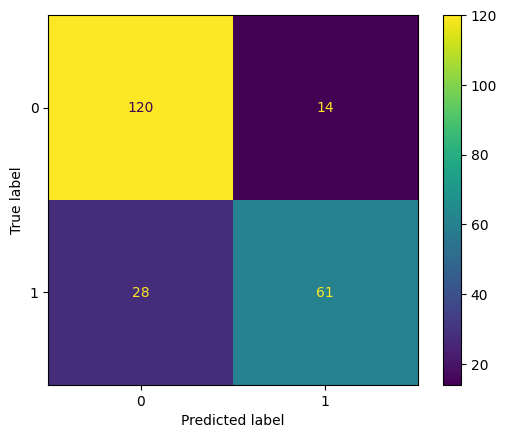

In [28]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
print("Accuracy:",accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()


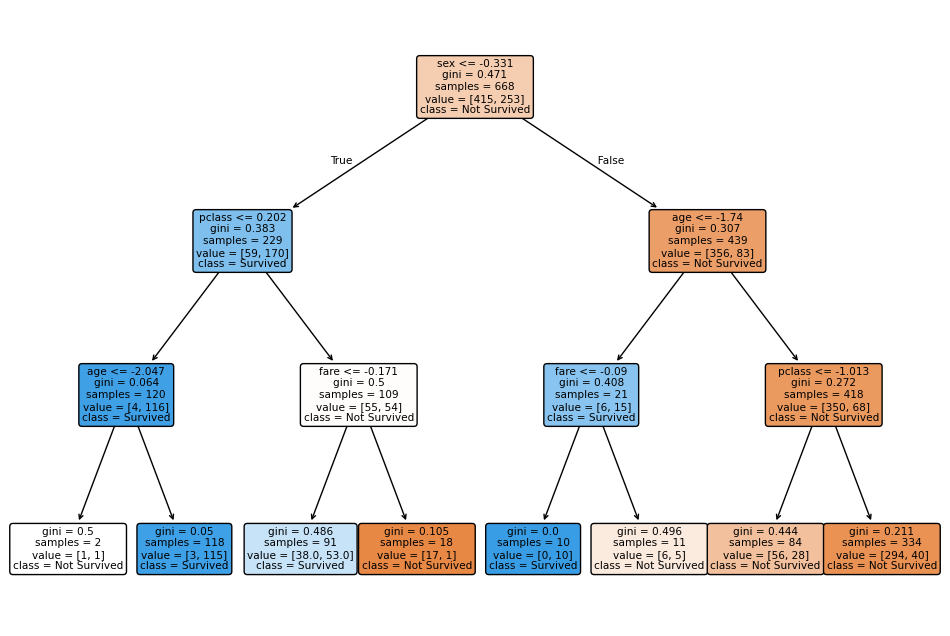

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtc,feature_names=X.columns,class_names=["Not Survived","Survived"],filled=True,rounded=True)
plt.show()